# Parallel Charging

Milou van Nederveen

Quantum Inspire Starmon-5

Dates of data acquirement: 15/12

In [2]:
import numpy as np
import os

from qiskit.tools.visualization import circuit_drawer, plot_histogram
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer
from IPython.display import display, Math, Latex

from quantuminspire.credentials import get_authentication
from quantuminspire.api import QuantumInspireAPI
from quantuminspire.qiskit import QI
import matplotlib.pyplot as plt
from qiskit import IBMQ, QuantumCircuit, pulse, schedule, transpile
from scipy.optimize import curve_fit


QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')

authentication = get_authentication()
#authentication = set_authentication('MY_API_CODE',QI_URL)
QI.set_authentication(authentication, QI_URL)
QI.set_project_name('Parallel Charging q0q1q2q3q4')


backend = QI.get_backend('Starmon-5')

font = {'family':'serif','size':12}

In [21]:
from fractions import Fraction
import matplotlib.ticker as ticker

#function to get pi axis labels 
def pi_axis(value, tick_number):
    if np.isclose(value, 0):  
        return '0'
    elif np.isclose(value, np.pi): 
        return r'$\pi$'
    else:
        frac = Fraction(value / np.pi).limit_denominator(8)  
        if frac == 1:
            return r'$\pi$'
        elif frac == -1:
            return r'$-\pi$'
        else:
            if frac.numerator == 1:
                return r'$\frac{\pi}{' + f"{frac.denominator}" + r'}$'
            elif frac.numerator == -1:
                return r'$\frac{-\pi}{' + f"{frac.denominator}" + r'}$'
            else:
                return r'$\frac{' + f"{frac.numerator}\pi" + r'}{' + f"{frac.denominator}" + r'}$'

In [22]:
def finding_value(counts,qubit,shots):
    total = 0
    if qubit == 0:
        for binary_string, number in counts.items():
            if binary_string[4] == '1':
                total += number
    if qubit == 1:
        for binary_string, number in counts.items():
             if binary_string[3] == '1':
                total += number
    if qubit == 2:
        for binary_string, number in counts.items():
             if binary_string[2] == '1':
                total += number
    if qubit == 3:
        for binary_string, number in counts.items():
             if binary_string[1] == '1':
                total += number
    if qubit == 4:
        for binary_string, number in counts.items():
             if binary_string[0] == '1':
                total += number
    return total/shots

In [23]:
theta = np.linspace(0, np.pi, 16)
shots = 1024
y_values = []
qubit=[0,1,2,3,4]

num_datapoints=10

data0=[]
data1=[]
data2=[]
data3=[]
data4=[]

q0_values=[]
q1_values=[]
q2_values=[]
q3_values=[]
q4_values=[]

#
#for i in range(num_datapoints):
#    for t in theta:
#        qc=QuantumCircuit(5)
    
#        for q in qubit:
#            qc.rx(t,q)
            
#        qc.measure_all()
#        job = backend.run(qc,shots)
#        counts = job.result().get_counts()
    
#        q0_values.append(finding_value(counts,0,shots))
#        q1_values.append(finding_value(counts,1,shots))
#        q2_values.append(finding_value(counts,2,shots))
#        q3_values.append(finding_value(counts,3,shots))
#        q4_values.append(finding_value(counts,4,shots))
        
#    data0.append(q0_values)
#    data1.append(q1_values)
#    data2.append(q2_values)
#    data3.append(q3_values)
#    data4.append(q4_values)
    
#    q0_values=[]
#    q1_values=[]
 #   q2_values=[]
#    q3_values=[]
 #   q4_values=[]

In [24]:
data0=[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [25]:
data1=[[0.0146484375, 0.025390625, 0.056640625, 0.12109375, 0.154296875, 0.2548828125, 0.3408203125, 0.4189453125, 0.51953125, 0.634765625, 0.740234375, 0.826171875, 0.8525390625, 0.9169921875, 0.9541015625, 0.9599609375], [0.015625, 0.0302734375, 0.0634765625, 0.1201171875, 0.16796875, 0.2568359375, 0.3310546875, 0.4296875, 0.5380859375, 0.65234375, 0.7412109375, 0.82421875, 0.8544921875, 0.9111328125, 0.9462890625, 0.947265625], [0.0185546875, 0.0390625, 0.076171875, 0.111328125, 0.1630859375, 0.23828125, 0.3330078125, 0.4296875, 0.521484375, 0.6552734375, 0.7353515625, 0.837890625, 0.8701171875, 0.9150390625, 0.9384765625, 0.9482421875], [0.0126953125, 0.02734375, 0.056640625, 0.1220703125, 0.1669921875, 0.224609375, 0.3408203125, 0.4287109375, 0.5361328125, 0.6484375, 0.7451171875, 0.837890625, 0.84375, 0.892578125, 0.9287109375, 0.95703125], [0.0166015625, 0.021484375, 0.060546875, 0.119140625, 0.1572265625, 0.2470703125, 0.3583984375, 0.4404296875, 0.56640625, 0.650390625, 0.7548828125, 0.837890625, 0.85546875, 0.9013671875, 0.9462890625, 0.9619140625], [0.017578125, 0.025390625, 0.0703125, 0.1279296875, 0.1513671875, 0.26171875, 0.30859375, 0.42578125, 0.546875, 0.6552734375, 0.744140625, 0.828125, 0.86328125, 0.927734375, 0.9443359375, 0.962890625], [0.005859375, 0.033203125, 0.0673828125, 0.119140625, 0.150390625, 0.255859375, 0.306640625, 0.453125, 0.5361328125, 0.6533203125, 0.73828125, 0.8212890625, 0.8486328125, 0.9140625, 0.9443359375, 0.9541015625], [0.0205078125, 0.01953125, 0.0556640625, 0.119140625, 0.1376953125, 0.2529296875, 0.341796875, 0.416015625, 0.548828125, 0.6435546875, 0.7353515625, 0.8310546875, 0.8564453125, 0.8994140625, 0.9345703125, 0.9462890625], [0.0146484375, 0.0263671875, 0.0654296875, 0.119140625, 0.1650390625, 0.2099609375, 0.34375, 0.4375, 0.5458984375, 0.6416015625, 0.7412109375, 0.8056640625, 0.869140625, 0.9111328125, 0.9423828125, 0.9521484375], [0.0166015625, 0.021484375, 0.056640625, 0.1005859375, 0.1572265625, 0.2333984375, 0.318359375, 0.421875, 0.5361328125, 0.65234375, 0.73046875, 0.8369140625, 0.8388671875, 0.8916015625, 0.9501953125, 0.955078125]]


In [26]:
print(data1)

[[0.0146484375, 0.025390625, 0.056640625, 0.12109375, 0.154296875, 0.2548828125, 0.3408203125, 0.4189453125, 0.51953125, 0.634765625, 0.740234375, 0.826171875, 0.8525390625, 0.9169921875, 0.9541015625, 0.9599609375], [0.015625, 0.0302734375, 0.0634765625, 0.1201171875, 0.16796875, 0.2568359375, 0.3310546875, 0.4296875, 0.5380859375, 0.65234375, 0.7412109375, 0.82421875, 0.8544921875, 0.9111328125, 0.9462890625, 0.947265625], [0.0185546875, 0.0390625, 0.076171875, 0.111328125, 0.1630859375, 0.23828125, 0.3330078125, 0.4296875, 0.521484375, 0.6552734375, 0.7353515625, 0.837890625, 0.8701171875, 0.9150390625, 0.9384765625, 0.9482421875], [0.0126953125, 0.02734375, 0.056640625, 0.1220703125, 0.1669921875, 0.224609375, 0.3408203125, 0.4287109375, 0.5361328125, 0.6484375, 0.7451171875, 0.837890625, 0.84375, 0.892578125, 0.9287109375, 0.95703125], [0.0166015625, 0.021484375, 0.060546875, 0.119140625, 0.1572265625, 0.2470703125, 0.3583984375, 0.4404296875, 0.56640625, 0.650390625, 0.7548828125

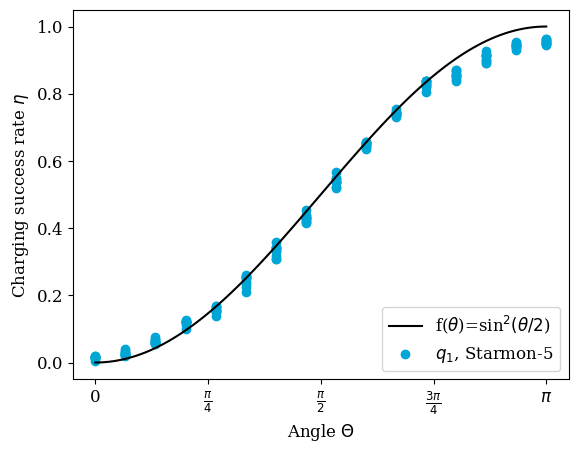

In [27]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'
tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)

plt.plot(x_func, y_func, color='black')

for i in range(len(data1)):
    plt.scatter(theta,data1[i],color=tud_color)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_1$, Starmon-5"], prop=font, loc="lower right")
plt.show()

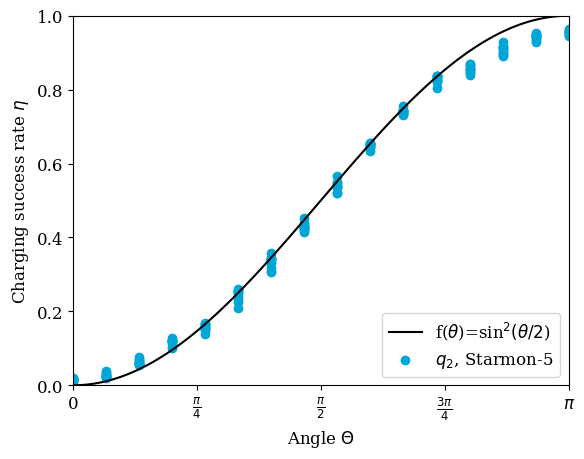

In [28]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data1)):
    plt.scatter(theta,data1[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions,**font)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_2$, Starmon-5"], prop=font, loc="lower right")
plt.show()


In [29]:
data2=[[0.072265625, 0.0849609375, 0.10546875, 0.1552734375, 0.166015625, 0.2509765625, 0.3759765625, 0.4443359375, 0.5556640625, 0.6728515625, 0.78515625, 0.853515625, 0.880859375, 0.9384765625, 0.9658203125, 0.978515625], [0.052734375, 0.0859375, 0.1044921875, 0.1689453125, 0.216796875, 0.25390625, 0.3671875, 0.490234375, 0.556640625, 0.6826171875, 0.7548828125, 0.8544921875, 0.900390625, 0.939453125, 0.9677734375, 0.9765625], [0.0634765625, 0.056640625, 0.11328125, 0.16015625, 0.2021484375, 0.271484375, 0.3935546875, 0.4794921875, 0.615234375, 0.6845703125, 0.7705078125, 0.8583984375, 0.8984375, 0.9404296875, 0.9736328125, 0.982421875], [0.0908203125, 0.078125, 0.123046875, 0.171875, 0.220703125, 0.2939453125, 0.3798828125, 0.484375, 0.552734375, 0.6875, 0.7578125, 0.8681640625, 0.87109375, 0.9365234375, 0.9716796875, 0.984375], [0.0712890625, 0.06640625, 0.1123046875, 0.16796875, 0.1884765625, 0.294921875, 0.37890625, 0.4853515625, 0.5703125, 0.666015625, 0.779296875, 0.8583984375, 0.8876953125, 0.94140625, 0.96875, 0.970703125], [0.078125, 0.0869140625, 0.1240234375, 0.1572265625, 0.189453125, 0.29296875, 0.3828125, 0.4794921875, 0.5849609375, 0.6669921875, 0.7724609375, 0.8466796875, 0.87890625, 0.9248046875, 0.9658203125, 0.9755859375], [0.07421875, 0.068359375, 0.1005859375, 0.166015625, 0.2041015625, 0.283203125, 0.3642578125, 0.48828125, 0.572265625, 0.6875, 0.783203125, 0.8408203125, 0.8837890625, 0.94921875, 0.9765625, 0.9775390625], [0.0546875, 0.06640625, 0.1044921875, 0.1591796875, 0.2275390625, 0.271484375, 0.373046875, 0.48828125, 0.583984375, 0.6650390625, 0.7568359375, 0.8369140625, 0.8876953125, 0.94140625, 0.9638671875, 0.9833984375], [0.0556640625, 0.0712890625, 0.099609375, 0.166015625, 0.2099609375, 0.2802734375, 0.3701171875, 0.4736328125, 0.5625, 0.6748046875, 0.787109375, 0.8603515625, 0.8916015625, 0.947265625, 0.974609375, 0.9833984375], [0.0693359375, 0.06640625, 0.125, 0.1611328125, 0.2021484375, 0.294921875, 0.3671875, 0.4853515625, 0.5927734375, 0.6484375, 0.767578125, 0.84765625, 0.8896484375, 0.939453125, 0.9765625, 0.9697265625]]
print(data2)

[[0.072265625, 0.0849609375, 0.10546875, 0.1552734375, 0.166015625, 0.2509765625, 0.3759765625, 0.4443359375, 0.5556640625, 0.6728515625, 0.78515625, 0.853515625, 0.880859375, 0.9384765625, 0.9658203125, 0.978515625], [0.052734375, 0.0859375, 0.1044921875, 0.1689453125, 0.216796875, 0.25390625, 0.3671875, 0.490234375, 0.556640625, 0.6826171875, 0.7548828125, 0.8544921875, 0.900390625, 0.939453125, 0.9677734375, 0.9765625], [0.0634765625, 0.056640625, 0.11328125, 0.16015625, 0.2021484375, 0.271484375, 0.3935546875, 0.4794921875, 0.615234375, 0.6845703125, 0.7705078125, 0.8583984375, 0.8984375, 0.9404296875, 0.9736328125, 0.982421875], [0.0908203125, 0.078125, 0.123046875, 0.171875, 0.220703125, 0.2939453125, 0.3798828125, 0.484375, 0.552734375, 0.6875, 0.7578125, 0.8681640625, 0.87109375, 0.9365234375, 0.9716796875, 0.984375], [0.0712890625, 0.06640625, 0.1123046875, 0.16796875, 0.1884765625, 0.294921875, 0.37890625, 0.4853515625, 0.5703125, 0.666015625, 0.779296875, 0.8583984375, 0.887

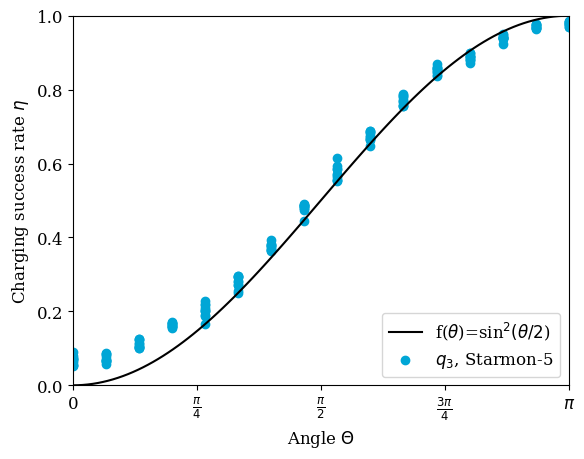

In [30]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data1)):
    plt.scatter(theta,data2[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions,**font)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_3$, Starmon-5"], prop=font, loc="lower right")
plt.show()

In [31]:
data3=[[0.04296875, 0.0576171875, 0.0869140625, 0.140625, 0.1796875, 0.26953125, 0.3583984375, 0.4716796875, 0.5634765625, 0.6640625, 0.751953125, 0.81640625, 0.8779296875, 0.9423828125, 0.9755859375, 0.974609375], [0.0400390625, 0.06640625, 0.0869140625, 0.1171875, 0.1650390625, 0.25390625, 0.3564453125, 0.4599609375, 0.5537109375, 0.6787109375, 0.75, 0.85546875, 0.873046875, 0.9345703125, 0.970703125, 0.9814453125], [0.03125, 0.05078125, 0.0908203125, 0.138671875, 0.18359375, 0.265625, 0.3564453125, 0.453125, 0.5830078125, 0.673828125, 0.7822265625, 0.84765625, 0.8935546875, 0.9287109375, 0.955078125, 0.9775390625], [0.0673828125, 0.06640625, 0.0908203125, 0.158203125, 0.1953125, 0.2734375, 0.3515625, 0.4697265625, 0.5556640625, 0.6767578125, 0.7666015625, 0.857421875, 0.873046875, 0.9345703125, 0.9599609375, 0.984375], [0.041015625, 0.0517578125, 0.095703125, 0.140625, 0.1962890625, 0.2412109375, 0.345703125, 0.462890625, 0.587890625, 0.673828125, 0.759765625, 0.853515625, 0.87890625, 0.9345703125, 0.9697265625, 0.978515625], [0.0576171875, 0.041015625, 0.08203125, 0.146484375, 0.1923828125, 0.263671875, 0.3701171875, 0.4677734375, 0.5791015625, 0.658203125, 0.740234375, 0.837890625, 0.8955078125, 0.9384765625, 0.96484375, 0.9755859375], [0.05078125, 0.060546875, 0.072265625, 0.1640625, 0.16796875, 0.2734375, 0.36328125, 0.4443359375, 0.5673828125, 0.646484375, 0.775390625, 0.8466796875, 0.8515625, 0.9345703125, 0.9609375, 0.9814453125], [0.04296875, 0.0712890625, 0.078125, 0.1435546875, 0.189453125, 0.2646484375, 0.3583984375, 0.462890625, 0.5458984375, 0.7080078125, 0.765625, 0.8330078125, 0.875, 0.951171875, 0.9619140625, 0.9755859375], [0.0517578125, 0.07421875, 0.0712890625, 0.142578125, 0.1796875, 0.26171875, 0.33203125, 0.4853515625, 0.5419921875, 0.6572265625, 0.783203125, 0.849609375, 0.8955078125, 0.9189453125, 0.962890625, 0.98046875], [0.0322265625, 0.056640625, 0.09765625, 0.1572265625, 0.185546875, 0.2783203125, 0.34375, 0.4462890625, 0.57421875, 0.68359375, 0.7734375, 0.83984375, 0.8818359375, 0.931640625, 0.9677734375, 0.98046875]]
print(data3)

[[0.04296875, 0.0576171875, 0.0869140625, 0.140625, 0.1796875, 0.26953125, 0.3583984375, 0.4716796875, 0.5634765625, 0.6640625, 0.751953125, 0.81640625, 0.8779296875, 0.9423828125, 0.9755859375, 0.974609375], [0.0400390625, 0.06640625, 0.0869140625, 0.1171875, 0.1650390625, 0.25390625, 0.3564453125, 0.4599609375, 0.5537109375, 0.6787109375, 0.75, 0.85546875, 0.873046875, 0.9345703125, 0.970703125, 0.9814453125], [0.03125, 0.05078125, 0.0908203125, 0.138671875, 0.18359375, 0.265625, 0.3564453125, 0.453125, 0.5830078125, 0.673828125, 0.7822265625, 0.84765625, 0.8935546875, 0.9287109375, 0.955078125, 0.9775390625], [0.0673828125, 0.06640625, 0.0908203125, 0.158203125, 0.1953125, 0.2734375, 0.3515625, 0.4697265625, 0.5556640625, 0.6767578125, 0.7666015625, 0.857421875, 0.873046875, 0.9345703125, 0.9599609375, 0.984375], [0.041015625, 0.0517578125, 0.095703125, 0.140625, 0.1962890625, 0.2412109375, 0.345703125, 0.462890625, 0.587890625, 0.673828125, 0.759765625, 0.853515625, 0.87890625, 0.9

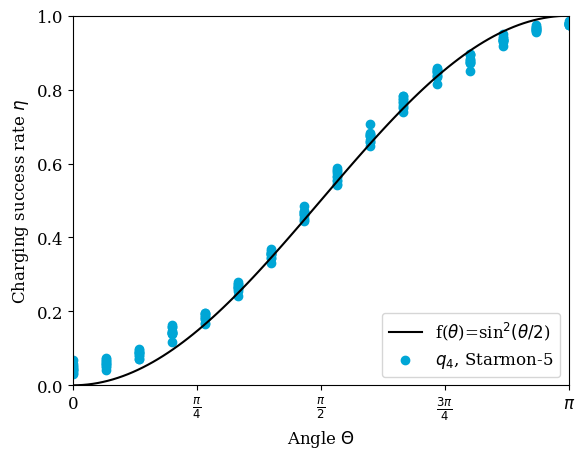

In [32]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data1)):
    plt.scatter(theta,data3[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions,**font)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xticks(font=font)
plt.yticks(font=font)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "$q_4$, Starmon-5"], prop=font, loc="lower right")
plt.show()

In [33]:
data4=[[0.005859375, 0.01953125, 0.0478515625, 0.109375, 0.1376953125, 0.2431640625, 0.3173828125, 0.41796875, 0.5107421875, 0.626953125, 0.703125, 0.810546875, 0.8203125, 0.876953125, 0.9287109375, 0.93359375], [0.00390625, 0.0146484375, 0.048828125, 0.08984375, 0.138671875, 0.2294921875, 0.3349609375, 0.39453125, 0.55078125, 0.6005859375, 0.740234375, 0.802734375, 0.8232421875, 0.8759765625, 0.93359375, 0.9306640625], [0.00390625, 0.0185546875, 0.048828125, 0.091796875, 0.150390625, 0.220703125, 0.322265625, 0.4423828125, 0.515625, 0.642578125, 0.7294921875, 0.8134765625, 0.8564453125, 0.9013671875, 0.9345703125, 0.94921875], [0.0068359375, 0.0146484375, 0.0498046875, 0.103515625, 0.125, 0.2138671875, 0.3369140625, 0.4130859375, 0.5146484375, 0.6259765625, 0.7158203125, 0.8203125, 0.83203125, 0.89453125, 0.91796875, 0.947265625], [0.00390625, 0.021484375, 0.060546875, 0.1025390625, 0.15234375, 0.236328125, 0.3154296875, 0.431640625, 0.560546875, 0.640625, 0.72265625, 0.7998046875, 0.8369140625, 0.892578125, 0.9072265625, 0.9482421875], [0.0126953125, 0.0205078125, 0.0615234375, 0.1337890625, 0.1259765625, 0.2392578125, 0.2939453125, 0.4443359375, 0.54296875, 0.619140625, 0.720703125, 0.81640625, 0.8330078125, 0.8896484375, 0.9111328125, 0.947265625], [0.0107421875, 0.0205078125, 0.0703125, 0.1162109375, 0.1611328125, 0.228515625, 0.3046875, 0.416015625, 0.51953125, 0.650390625, 0.7177734375, 0.802734375, 0.8369140625, 0.8876953125, 0.9306640625, 0.9521484375], [0.0078125, 0.0166015625, 0.060546875, 0.1103515625, 0.1494140625, 0.203125, 0.2919921875, 0.41015625, 0.5380859375, 0.62890625, 0.720703125, 0.79296875, 0.8486328125, 0.9013671875, 0.9306640625, 0.9072265625], [0.0048828125, 0.015625, 0.0380859375, 0.1103515625, 0.1455078125, 0.2041015625, 0.3037109375, 0.4228515625, 0.5283203125, 0.6025390625, 0.705078125, 0.78515625, 0.8369140625, 0.890625, 0.919921875, 0.9052734375], [0.0029296875, 0.0185546875, 0.0517578125, 0.103515625, 0.1376953125, 0.25, 0.314453125, 0.4169921875, 0.5126953125, 0.6015625, 0.7138671875, 0.8115234375, 0.8486328125, 0.8779296875, 0.923828125, 0.9150390625]]
print(data4)

[[0.005859375, 0.01953125, 0.0478515625, 0.109375, 0.1376953125, 0.2431640625, 0.3173828125, 0.41796875, 0.5107421875, 0.626953125, 0.703125, 0.810546875, 0.8203125, 0.876953125, 0.9287109375, 0.93359375], [0.00390625, 0.0146484375, 0.048828125, 0.08984375, 0.138671875, 0.2294921875, 0.3349609375, 0.39453125, 0.55078125, 0.6005859375, 0.740234375, 0.802734375, 0.8232421875, 0.8759765625, 0.93359375, 0.9306640625], [0.00390625, 0.0185546875, 0.048828125, 0.091796875, 0.150390625, 0.220703125, 0.322265625, 0.4423828125, 0.515625, 0.642578125, 0.7294921875, 0.8134765625, 0.8564453125, 0.9013671875, 0.9345703125, 0.94921875], [0.0068359375, 0.0146484375, 0.0498046875, 0.103515625, 0.125, 0.2138671875, 0.3369140625, 0.4130859375, 0.5146484375, 0.6259765625, 0.7158203125, 0.8203125, 0.83203125, 0.89453125, 0.91796875, 0.947265625], [0.00390625, 0.021484375, 0.060546875, 0.1025390625, 0.15234375, 0.236328125, 0.3154296875, 0.431640625, 0.560546875, 0.640625, 0.72265625, 0.7998046875, 0.836914

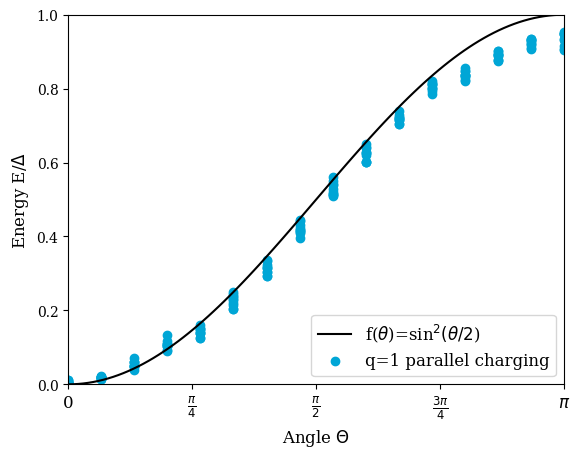

In [34]:
# Generate the function values
x_func = np.linspace(min(theta), max(theta), 100)
y_func = np.sin(x_func/2)**2

tud_color='#00A6D6'

plt.plot(x_func, y_func, color='black')

for i in range(len(data1)):
    plt.scatter(theta,data4[i],color=tud_color)

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions,**font)

plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.yticks(fontname='serif')

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Energy E/$\\Delta$",**font)

plt.legend(["f($\\theta$)=sin$^2(\\theta/2$)", "q=1 parallel charging"], prop=font, loc="lower right")
plt.show()

# Data Analysis q=1

In [35]:
data=np.array(data1)
data1=data.transpose()

In [36]:
#Mean Value
mean_values1 = []
for t in range(len(theta)):
    mean_values1.append(np.mean(data1[t])) 
    
print('Mean values q0:', mean_values1)

Mean values q0: [0.01533203125, 0.026953125, 0.062890625, 0.11796875, 0.15712890625, 0.2435546875, 0.33232421875, 0.43017578125, 0.53955078125, 0.64873046875, 0.740625, 0.8287109375, 0.8552734375, 0.90810546875, 0.94296875, 0.9544921875]


In [37]:
#Standard Deviation
std_dev1=[]
for t in range(len(theta)):
    std_dev1.append(np.std(data1[t])) 

print('Standard Deviation q1:', std_dev1)

Standard Deviation q1: [0.0037834708257442414, 0.005630287228671709, 0.0065829295102940305, 0.006943901888527804, 0.00881560661803516, 0.01582633951553351, 0.015698375078413023, 0.010502020505235306, 0.012905782400162788, 0.006389585079279527, 0.0063318613583778615, 0.009689153714697236, 0.00965563054242834, 0.010957100879903535, 0.007044800311277904, 0.005714351108721794]


In [38]:
#Standard Error
std_err1=[]

for t in range(len(theta)):
    std_err1.append(np.std(data1[t]) / np.sqrt(np.size(data1[t])))
    
print('Standard Error q1:', std_err1)

Standard Error q1: [0.0011964385270149824, 0.0017804531523559878, 0.0020817050928865983, 0.0021958545816492493, 0.0027877395869045102, 0.005004727989221166, 0.004964262081140953, 0.003321030483033584, 0.004081166737102903, 0.002020564215395085, 0.0020023103720881717, 0.0030639794337924534, 0.003053378475916063, 0.0034649395332730236, 0.002227761464470136, 0.0018070364853469338]


In [39]:
#Maximum values 
max_values1 = []
for t in range(len(theta)):
    max_values1.append(np.max(data1[t])) 
print('Maximum values q1:',max_values1)
    
#Minimum values
min_values1 = []
for t in range(len(theta)):
    min_values1.append(np.min(data1[t])) 
print('Minimum values q1:',min_values1)

Maximum values q1: [0.0205078125, 0.0390625, 0.076171875, 0.1279296875, 0.16796875, 0.26171875, 0.3583984375, 0.453125, 0.56640625, 0.6552734375, 0.7548828125, 0.837890625, 0.8701171875, 0.927734375, 0.9541015625, 0.962890625]
Minimum values q1: [0.005859375, 0.01953125, 0.0556640625, 0.1005859375, 0.1376953125, 0.2099609375, 0.306640625, 0.416015625, 0.51953125, 0.634765625, 0.73046875, 0.8056640625, 0.8388671875, 0.8916015625, 0.9287109375, 0.9462890625]


In [40]:
from scipy.optimize import curve_fit

def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

guess = [0.9999, 0]

xdata=theta
ydata=mean_values1

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)

fit_a1 = parameters[0]
fit_b1 = parameters[1]

SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a1:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b1:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.97187 with standard error of 0.00507.
The value of phi is -0.08569 with standard error of 0.03360.


# Data Analysis q=2

In [41]:
data=np.array(data2)
data2=data.transpose()

In [42]:
#Mean Value
mean_values2 = []
for t in range(len(theta)):
    mean_values2.append(np.mean(data2[t])) 
    
print('Mean values:', mean_values2)
print('')

#Standard Deviation
std_dev2=[]
for t in range(len(theta)):
    std_dev2.append(np.std(data2[t])) 

print('Standard Deviation:', std_dev2)
print('')

#Standard Error
std_err2=[]

for t in range(len(theta)):
    std_err2.append(np.std(data2[t]) / np.sqrt(np.size(data2[t])))
    
print('Standard Error:', std_err2)
print('')

#Maximum values 
max_values2 = []
for t in range(len(theta)):
    max_values2.append(np.max(data2[t])) 
print('Maximum values:',max_values2)
print('')
    
#Minimum values
min_values2 = []
for t in range(len(theta)):
    min_values2.append(np.min(data2[t])) 
print('Minimum values:',min_values2)

Mean values: [0.06826171875, 0.07314453125, 0.11123046875, 0.16337890625, 0.202734375, 0.27880859375, 0.37529296875, 0.4798828125, 0.57470703125, 0.6736328125, 0.771484375, 0.8525390625, 0.88701171875, 0.93984375, 0.9705078125, 0.97822265625]

Standard Deviation: [0.011291444520536403, 0.009760252428386282, 0.009330644583560482, 0.005241694101687361, 0.01708398337019118, 0.015723869324320915, 0.00842394835476744, 0.012771705253337356, 0.018724806071806398, 0.01182245777376684, 0.01150521599611183, 0.009045731388210477, 0.008401275864844968, 0.006225538066605167, 0.004470907477445155, 0.0049804687500000005]

Standard Error: [0.0035706682758322923, 0.003086462821189011, 0.0029506088921564403, 0.00165756921592023, 0.005402429895824366, 0.00497232406957069, 0.0026638863692693246, 0.004038767820488385, 0.005921303593185859, 0.003738589410626687, 0.003638268751991632, 0.0028605114288821894, 0.002656716698431102, 0.001968687995055336, 0.0014138250836604575, 0.0015749625065291733]

Maximum val

In [43]:
from scipy.optimize import curve_fit

def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

guess = [0.9999, 0]

xdata=theta
ydata=mean_values2

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)

fit_a2 = parameters[0]
fit_b2 = parameters[1]

SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a2:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b2:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96040 with standard error of 0.00553.
The value of phi is 0.16824 with standard error of 0.03268.


# Data Analysis q=3

In [44]:
data=np.array(data3)
data3=data.transpose()

#Mean Value
mean_values3 = []
for t in range(len(theta)):
    mean_values3.append(np.mean(data3[t])) 
    
print('Mean values:', mean_values3)
print('')

#Standard Deviation
std_dev3=[]
for t in range(len(theta)):
    std_dev3.append(np.std(data3[t])) 

print('Standard Deviation:', std_dev3)
print('')

#Standard Error
std_err3=[]

for t in range(len(theta)):
    std_err3.append(np.std(data3[t]) / np.sqrt(np.size(data3[t])))
    
print('Standard Error:', std_err3)
print('')

#Maximum values 
max_values3= []
for t in range(len(theta)):
    max_values3.append(np.max(data3[t])) 
print('Maximum values:',max_values3)
print('')
    
#Minimum values
min_values3 = []
for t in range(len(theta)):
    min_values3.append(np.min(data3[t])) 
print('Minimum values:',min_values3)

Mean values: [0.04580078125, 0.05966796875, 0.08525390625, 0.144921875, 0.18349609375, 0.26455078125, 0.35361328125, 0.46240234375, 0.565234375, 0.6720703125, 0.76484375, 0.84375, 0.87958984375, 0.9349609375, 0.96494140625, 0.97900390625]

Standard Deviation: [0.010648114362531005, 0.009701449287922543, 0.00869140625, 0.012446479661214703, 0.010162351682737259, 0.010199820154137906, 0.010283625087793168, 0.011720784328632633, 0.01499460759192909, 0.0162109375, 0.01358650803862397, 0.011791764725096548, 0.012658073388135101, 0.007983958373425663, 0.0057351745546976645, 0.003002036357214726]

Standard Error: [0.003367229417154986, 0.0030678676354453887, 0.002748463981982283, 0.003935922458039935, 0.003213617770109457, 0.0032254663411165493, 0.0032519677880675424, 0.003706437444208661, 0.004741711261094853, 0.0051263485506635835, 0.004296431085023868, 0.0037288834164134342, 0.004002834269607149, 0.0025247493203998245, 0.0018136214371486557, 0.0009493272507433389]

Maximum values: [0.06738

In [45]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

guess = [0.9999, 0]

xdata=theta
ydata=mean_values3

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)

fit_a3 = parameters[0]
fit_b3 = parameters[1]

SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a3:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b3:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96946 with standard error of 0.00447.
The value of phi is 0.09729 with standard error of 0.02864.


# Data Analysis q=4

In [46]:
data=np.array(data4)
data4=data.transpose()

#Mean Value
mean_values4 = []
for t in range(len(theta)):
    mean_values4.append(np.mean(data4[t])) 
    
print('Mean values:', mean_values4)
print('')

#Standard Deviation
std_dev4=[]
for t in range(len(theta)):
    std_dev4.append(np.std(data4[t])) 

print('Standard Deviation:', std_dev4)
print('')

#Standard Error
std_err4=[]

for t in range(len(theta)):
    std_err4.append(np.std(data4[t]) / np.sqrt(np.size(data4[t])))
    
print('Standard Error:', std_err4)
print('')

#Maximum values 
max_values4= []
for t in range(len(theta)):
    max_values4.append(np.max(data4[t])) 
print('Maximum values:',max_values4)
print('')
    
#Minimum values
min_values4 = []
for t in range(len(theta)):
    min_values4.append(np.min(data4[t])) 
print('Minimum values:',min_values4)

Mean values: [0.00634765625, 0.01806640625, 0.05380859375, 0.10712890625, 0.1423828125, 0.22685546875, 0.31357421875, 0.42099609375, 0.52939453125, 0.62392578125, 0.7189453125, 0.80556640625, 0.8373046875, 0.8888671875, 0.923828125, 0.93359375]

Standard Deviation: [0.0030649130520459403, 0.002402026147704852, 0.008804781949637597, 0.011832536769078791, 0.010968844595389823, 0.015304638148369893, 0.014573048189054609, 0.014315553564306869, 0.016792616193379874, 0.017001445484416032, 0.010314645255086635, 0.01040348490501838, 0.010752835631641254, 0.008894763700574765, 0.009024621134490565, 0.01739816737554113]

Standard Error: [0.0009692106074843361, 0.0007595873626027365, 0.002784316526199276, 0.003741776668797879, 0.00346865322218599, 0.0048397515313550864, 0.004608402472880464, 0.004526975522935142, 0.005310291504410695, 0.0053763291245939385, 0.0032617772262722236, 0.003289870790303858, 0.003400345190140168, 0.00281277125428042, 0.0028538357805082924, 0.005501783601954403]

Maximum

In [47]:
def sin2_func(x, a,b):
    y = a*np.sin(x/2)**2+2*np.sqrt(a)*np.sqrt(1-a)*np.sin(b)*np.sin(x/2)*np.cos(x/2)+(1-a)*np.cos(x/2)**2
    return y

guess = [0.9999, 0]

xdata=theta
ydata=mean_values4

#parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)
parameters, covariance = curve_fit(sin2_func, xdata, ydata, p0=guess)

fit_a4 = parameters[0]
fit_b4 = parameters[1]

SE = np.sqrt(np.diag(covariance))
SE_a = SE[0]
SE_b = SE[1]

print(F'The value of a is {fit_a4:.5f} with standard error of {SE_a:.5f}.')
print(F'The value of phi is {fit_b4:.5f} with standard error of {SE_b:.5f}.')

The value of a is 0.96633 with standard error of 0.00672.
The value of phi is -0.19525 with standard error of 0.04472.


# Fit functions all

In [48]:
theta = np.linspace(0, np.pi, 1600)
fit1=sin2_func(theta,fit_a1,fit_b1)
fit2=sin2_func(theta,fit_a2,fit_b2)
fit3=sin2_func(theta,fit_a3,fit_b3)
fit4=sin2_func(theta,fit_a4,fit_b4)

sin_ideal= np.sin(theta/2)**2

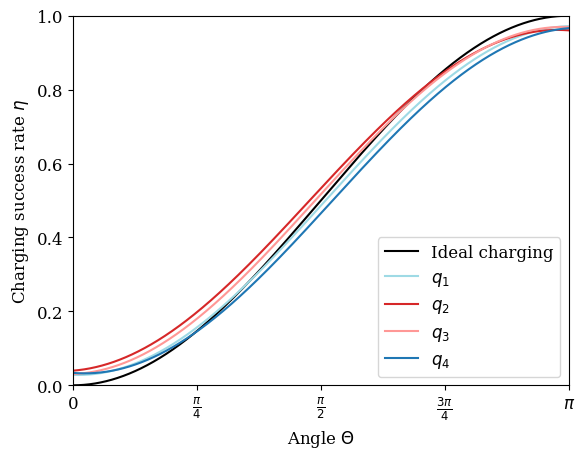

In [49]:
from fractions import Fraction
import matplotlib.ticker as ticker

tick_positions = np.linspace(0, np.pi, 5)

formatter = ticker.FuncFormatter(pi_axis)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(tick_positions)


plt.xticks(font=font)
plt.yticks(font=font)

plt.plot(theta,sin_ideal,color='black')
plt.plot(theta,fit1,color="#9EDAE5")
plt.plot(theta,fit2,color="#D62728")
plt.plot(theta,fit3,color="#FF9896")
plt.plot(theta,fit4,color="#1F77B4")
plt.xlim(0, np.pi)
plt.ylim(0, 1)

plt.xlabel("Angle $\\Theta$",**font)
plt.ylabel("Charging success rate $\eta$",**font)
plt.legend(["Ideal charging", "$q_1$","$q_2$","$q_3$","$q_4$"], prop=font, loc="lower right")